In [1]:
pip install GeoPandas==0.13.2

In [18]:
import geopandas as gpd
import pandas as pd
import folium

In [19]:
dados_sp = gpd.read_file('/content/geometria_sp.shp')
dados_sp.head()

,NM_DIST,geometry
0,Alto de Pinheiros,"POLYGON ((-46.72921 -23.54973, -46.73018 -23.5..."
1,Anhanguera,"POLYGON ((-46.80745 -23.45373, -46.80756 -23.4..."
2,Aricanduva,"POLYGON ((-46.52236 -23.58478, -46.52260 -23.5..."
3,Artur Alvim,"POLYGON ((-46.48595 -23.55433, -46.48613 -23.5..."
4,Barra Funda,"POLYGON ((-46.68561 -23.52338, -46.68563 -23.5..."


In [20]:
estatisticas_dist_sp = pd.read_csv('/content/estatisticas_dist_sp.csv')
estatisticas_dist_sp.head()

,NM_DIST,preco_min,preco_medio,preco_max,qtd_imoveis,area_min,area_max
0,Alto de Pinheiros,300000,1.766567e+06,3720000,21,39,310
1,Anhanguera,900000,9.000000e+05,900000,2,120,120
2,Aricanduva,235000,3.732157e+05,900000,19,45,83
3,Artur Alvim,175000,2.468407e+05,580000,27,33,153
4,Barra Funda,250000,1.080059e+06,3540000,17,42,204


<Axes: >

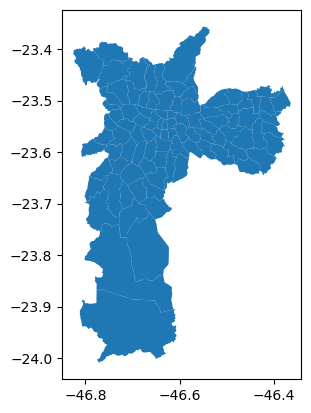

In [21]:
dados_sp.plot()

In [23]:
mapa_sp = folium.Map(location = [-23.7, -46.6],
                     zoom_start = 10,
                     tiles = 'cartodbpositron')

folium.Choropleth(geo_data = dados_sp,
                  data = estatisticas_dist_sp,
                  columns = ['NM_DIST', 'preco_medio'],
                  key_on = 'feature.properties.NM_DIST',
                  fill_color = 'YlOrRd',
                  nan_fill_color = 'white',
                  bins = 10,
                  highlight = True,
                  legend_name = 'Média do valor do imóvel'
                  ).add_to(mapa_sp)

mapa_sp

Output hidden; open in https://colab.research.google.com to view.

In [28]:
estatisticas_dist_sp = gpd.GeoDataFrame(estatisticas_dist_sp.merge(dados_sp, on = 'NM_DIST', how = 'left'))
estatisticas_dist_sp

,NM_DIST,preco_min,preco_medio,preco_max,qtd_imoveis,area_min,area_max,geometry
0,Alto de Pinheiros,300000,1.766567e+06,3720000,21,39,310,"POLYGON ((-46.72921 -23.54973, -46.73018 -23.5..."
1,Anhanguera,900000,9.000000e+05,900000,2,120,120,"POLYGON ((-46.80745 -23.45373, -46.80756 -23.4..."
2,Aricanduva,235000,3.732157e+05,900000,19,45,83,"POLYGON ((-46.52236 -23.58478, -46.52260 -23.5..."
3,Artur Alvim,175000,2.468407e+05,580000,27,33,153,"POLYGON ((-46.48595 -23.55433, -46.48613 -23.5..."
4,Barra Funda,250000,1.080059e+06,3540000,17,42,204,"POLYGON ((-46.68561 -23.52338, -46.68563 -23.5..."
...,...,...,...,...,...,...,...,...
84,Vila Matilde,210000,4.394838e+05,750000,37,34,140,"POLYGON ((-46.53259 -23.54319, -46.53317 -23.5..."
85,Vila Medeiros,265000,4.041278e+05,650000,38,41,82,"POLYGON ((-46.59123 -23.49983, -46.59156 -23.4..."
86,Vila Prudente,205000,6.250302e+05,2098000,29,35,155,"POLYGON ((-46.57900 -23.59952, -46.57899 -23.5..."
87,Vila Sônia,189900,8.243598e+05,3000000,50,32,420,"POLYGON ((-46.75131 -23.61098, -46.75132 -23.6..."


In [29]:
style_function = lambda x: {'fillColor': '#ffffff',
                            'color': '#000000',
                            'fillOpacity': 0.1,
                            'weight': 0.1}

highlight_function = lambda x: {'fillColor': '#000000',
                            'color': '#000000',
                            'fillOpacity': 0.5,
                            'weight': 0.1}

config = folium.features.GeoJson(
    estatisticas_dist_sp,
    style_function = style_function,
    highlight_function = highlight_function,
    tooltip = folium.features.GeoJsonTooltip(
        fields = ['NM_DIST', 'qtd_imoveis', 'area_min', 'area_max'],
        aliases = ['Distrito: ', 'Quantidade de imóveis', 'Área mínima: ', 'Área máxima: '],
        style = ("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px")
    )
)

mapa_sp.add_child(config)
mapa_sp.keep_in_front(config)

mapa_sp.save('mapa_imóveis_sp.html')
mapa_sp

Output hidden; open in https://colab.research.google.com to view.